EVALUATION

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
#LOAD THE DATASET

#load the data 
df = pd.read_csv("evaluation_data.csv")
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Costumer_for,age,total_spend,living_with,Children,Family_Size,is_parent,Clusters
0,1,58138.0,0,0,58,635,88,546,172,88,...,0,1,57283200000000000,68,1617,0,0,1,0,2
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,9763200000000000,71,27,0,2,3,1,3
2,1,71613.0,0,0,26,426,49,127,111,21,...,0,0,26956800000000000,60,776,1,0,2,0,2
3,1,26646.0,1,0,26,11,4,20,10,3,...,0,0,12009600000000000,41,53,1,1,3,1,1
4,2,58293.0,1,0,94,173,43,118,46,27,...,0,0,13910400000000000,44,422,1,1,3,1,0


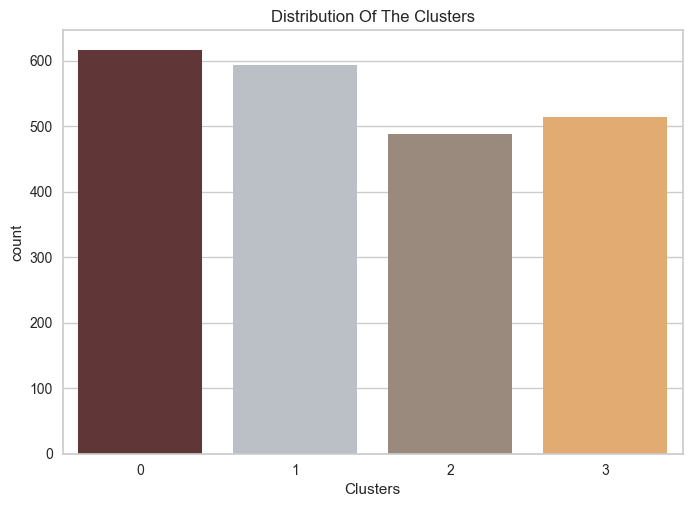

In [3]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

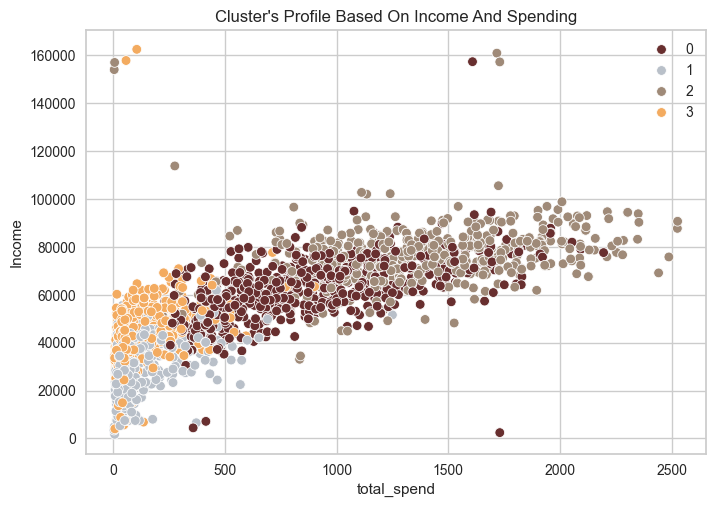

In [4]:
pl = sns.scatterplot(data = df,x=df["total_spend"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

income vs spending plot shows the cluster pattern

1)group 0 = high spending and avergae income

2)group 1 = low spending and low income

3)group 2 = high spending and high income

4)grouo 3= low spending and low income

next looking distribuitio of  clusters eg wines, meat and friut 

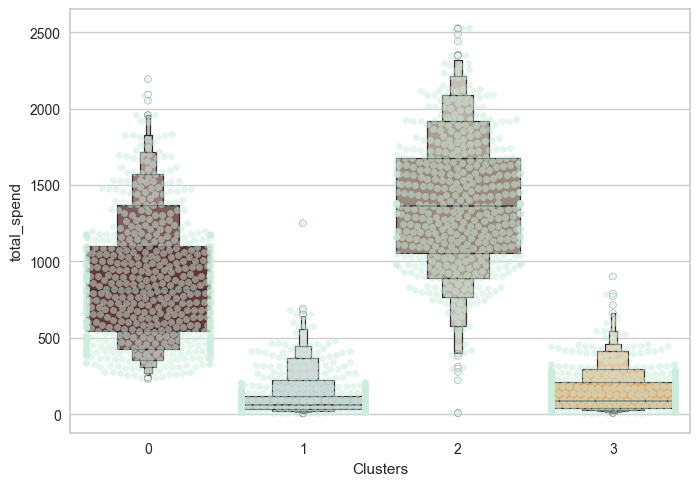

In [5]:
plt.figure()
pl=sns.swarmplot(x=df['Clusters'], y=df['total_spend'],color=  "#CBEDDD", alpha=0.5)
pl=sns.boxenplot(x=df["Clusters"], y=df["total_spend"], palette=pal)
plt.show()


cluster 2 is the biggest set of costumers follow by cluster 1 
We can explore what each clusters is spending with variuos marketing strategies

lets us explore how dey did in the past

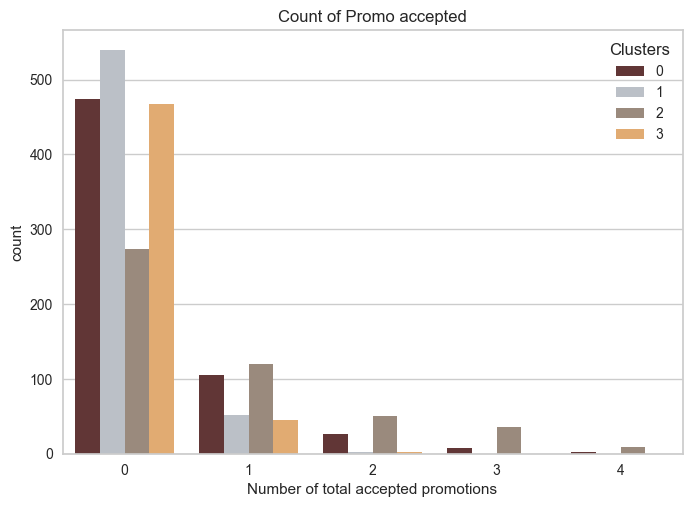

In [6]:
#creating a feature to get sum of accepted promotions 
df['Total_promo'] = df['AcceptedCmp1']  + df['AcceptedCmp2'] + df['AcceptedCmp3']+ df['AcceptedCmp4'] + df["AcceptedCmp5"]
#plot of total campaign accepted
plt.figure()
pl=sns.countplot(x=df['Total_promo'] , hue=df['Clusters'],palette= pal)
pl.set_title("Count of Promo accepted")
pl.set_xlabel("Number of total accepted promotions")
plt.show()

Perhaps better-targeted and well planned campagins are required to boost sales

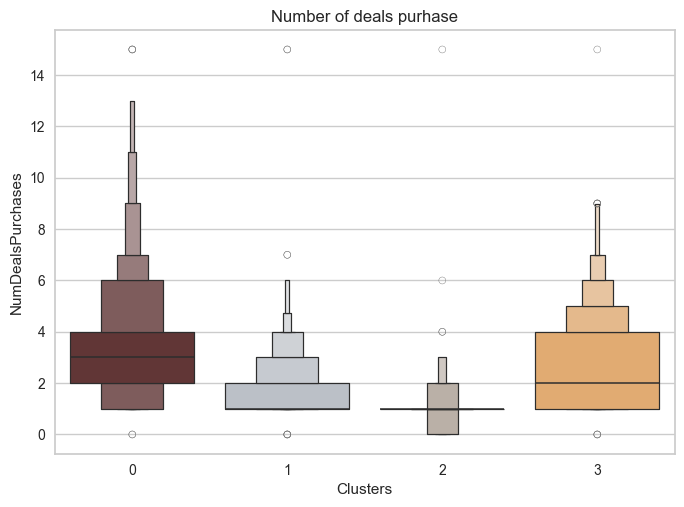

In [7]:
#plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y= df['NumDealsPurchases'], x=df['Clusters'],palette=pal)
pl.set_title("Number of deals purhase")
plt.show()


the deals did very well , the best outcome is cluster 0 and cluster 3 ,however the cluster 1 and 2 are not much into the deals , nothing seems to attract them 


Details in purhase style 

<Figure size 800x550 with 0 Axes>

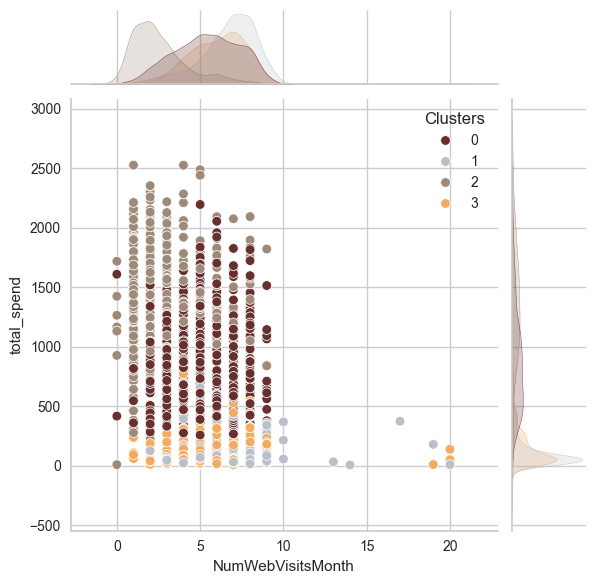

<Figure size 800x550 with 0 Axes>

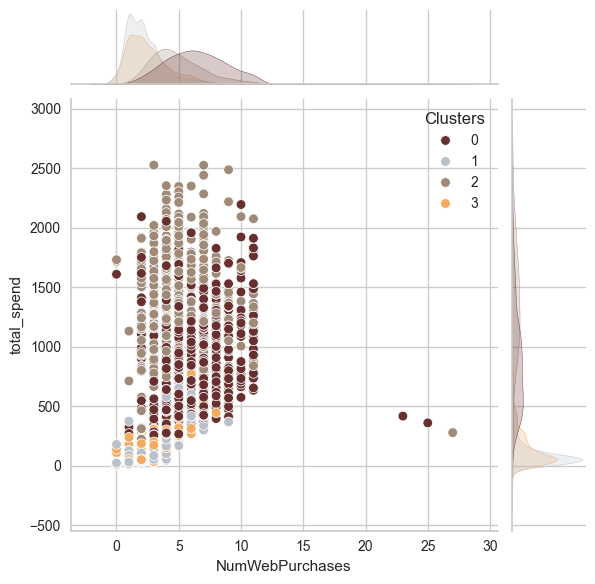

<Figure size 800x550 with 0 Axes>

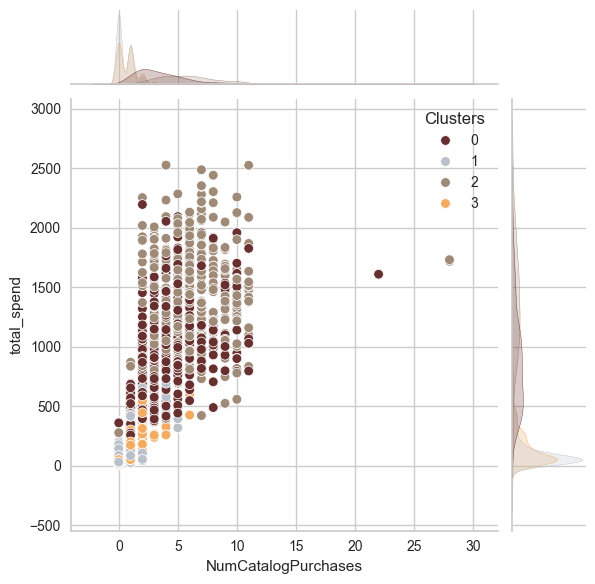

<Figure size 800x550 with 0 Axes>

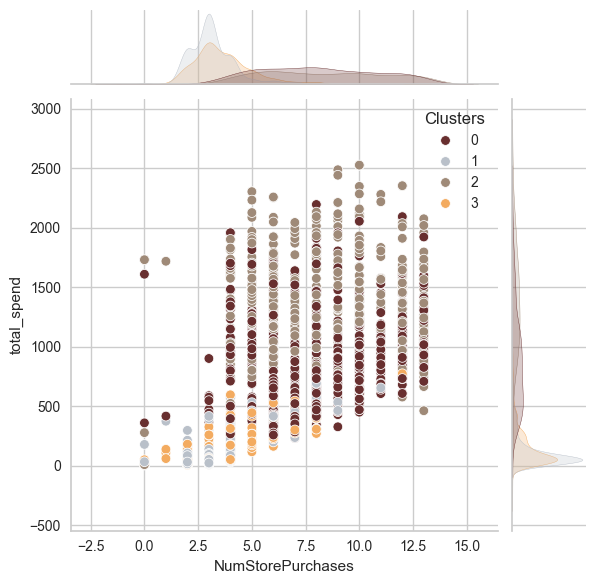

In [8]:
#for more details in purhasing style 
places = ['NumWebVisitsMonth',  'NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

for i in places:
   plt.figure()
   sns.jointplot(x= df[i],y=df['total_spend'],hue= df["Clusters"],palette= pal)
   plt.show()

<a id="8"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">PROFILING</p>

Now that we have formed the clusters and looked at their purchasing habits. 
Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. 
On the basis of the outcomes, I will be arriving at the conclusions. 

<Figure size 800x550 with 0 Axes>

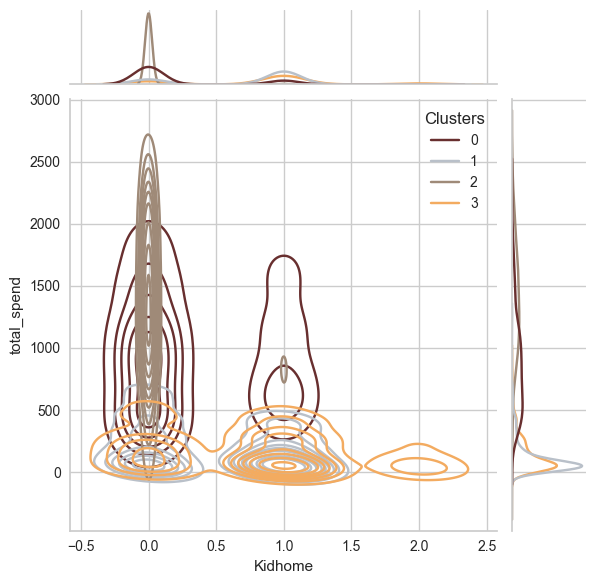

<Figure size 800x550 with 0 Axes>

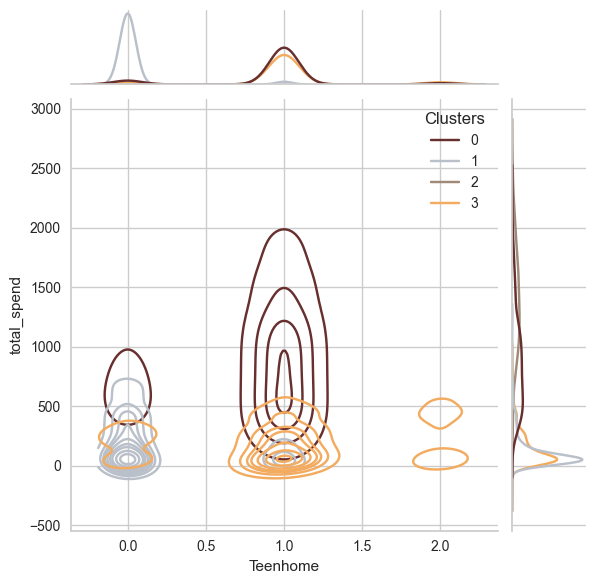

<Figure size 800x550 with 0 Axes>

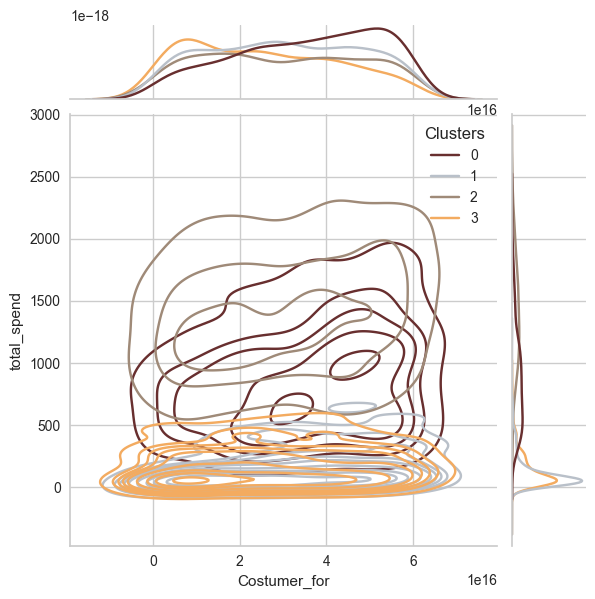

<Figure size 800x550 with 0 Axes>

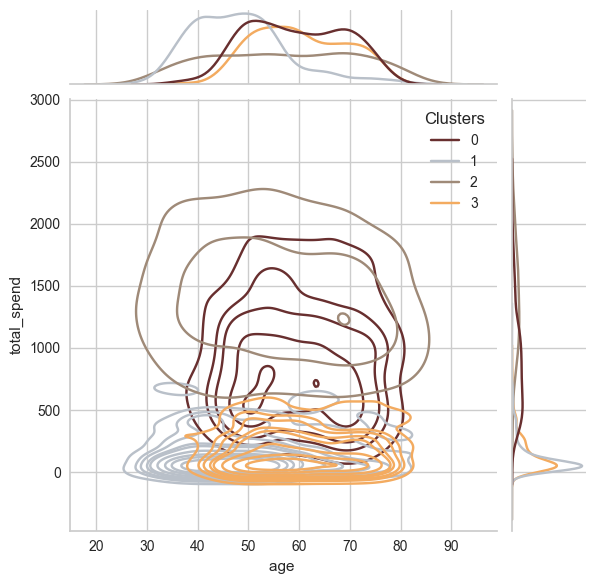

<Figure size 800x550 with 0 Axes>

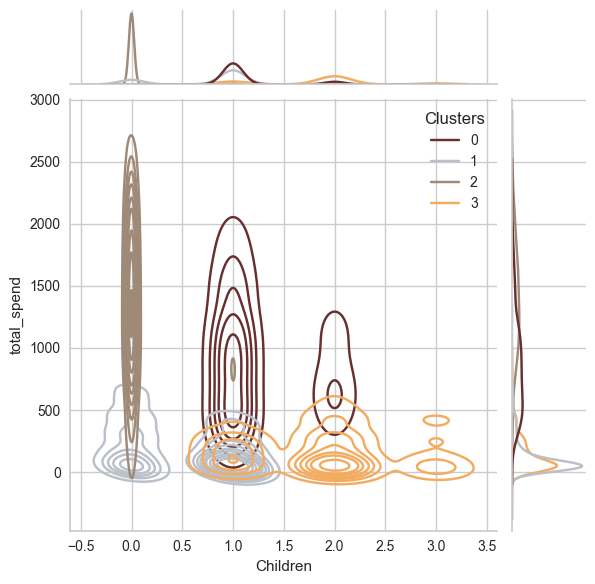

<Figure size 800x550 with 0 Axes>

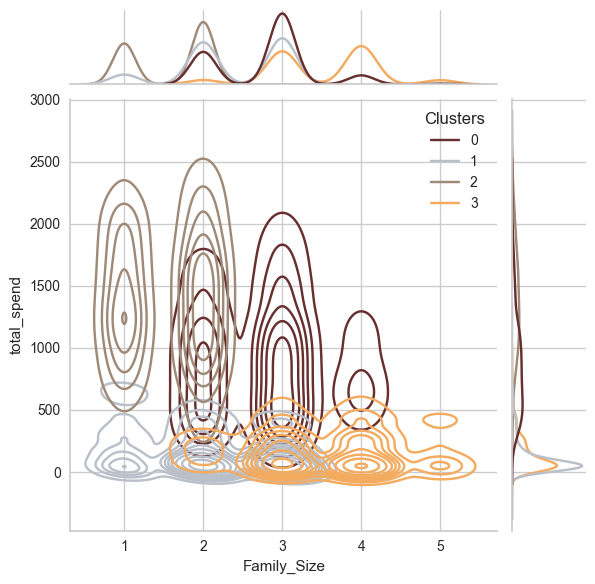

<Figure size 800x550 with 0 Axes>

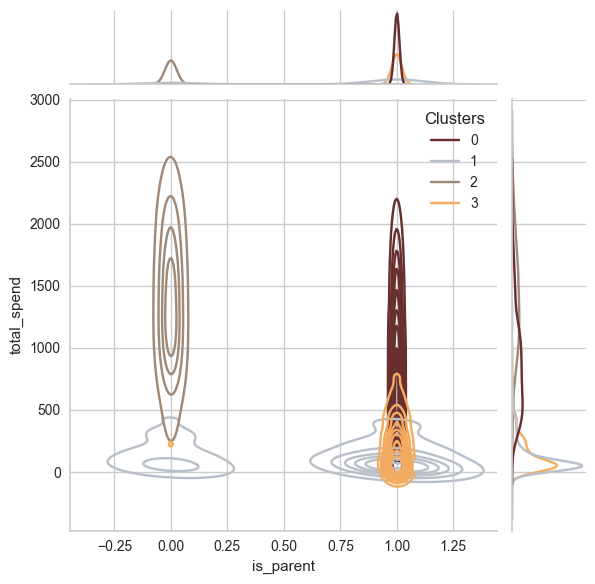

<Figure size 800x550 with 0 Axes>

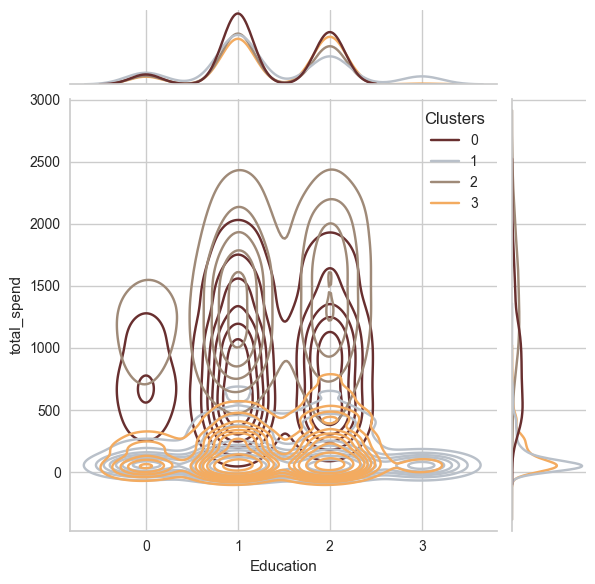

<Figure size 800x550 with 0 Axes>

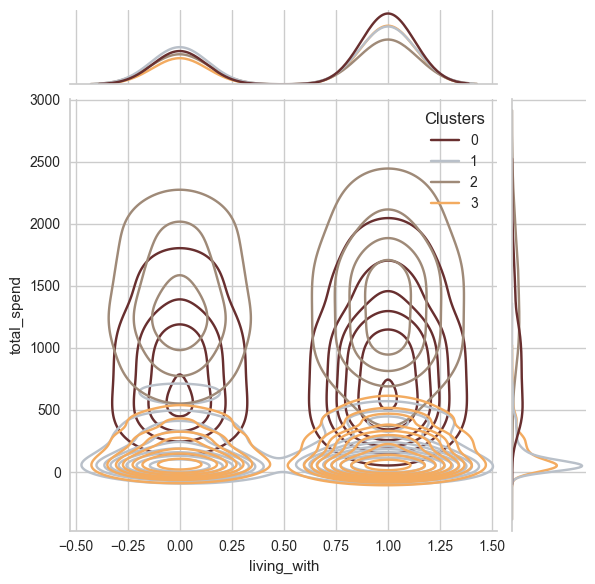

In [9]:
Personal =  [ "Kidhome","Teenhome","Costumer_for", "age ", "Children", "Family_Size", "is_parent", "Education","living_with"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["total_spend"],hue=df["Clusters"],kind="kde", palette=pal)
    plt.show()